# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [8]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender']=='Male']
female_df =  data.loc[data['Gender']=='Female']
data.groupby('Gender').agg(['mean','std'])
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Height                Weight           
             mean       std        mean        std
Gender                                            
Female  63.708774  2.696284  135.860093  19.022468
Male    69.026346  2.863362  187.020621  19.781155

## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

''

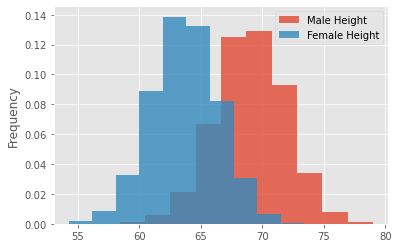

In [22]:
fig,ax=plt.subplots()
ax.hist(data=male_df,x= 'Height', alpha= 0.8, bins= 10, density= True)
ax.hist(data=female_df,x= 'Height', alpha= 0.8, bins= 10, density= True)
ax.set_ylabel('Frequency')
ax.legend(['Male Height','Female Height'])
;

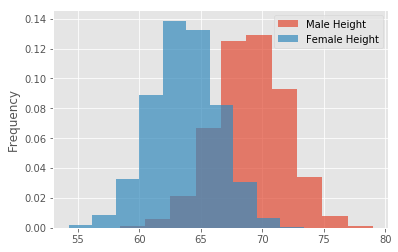

In [17]:
# Your code here

In [18]:
# Record your observations - are these inline with your personal observations?
"""
Male and Female heights have a similar distribution, with 
Males about 6 inches taller on average.
"""


In [23]:
import numpy as np
n, bins = np.histogram(male_df['Height'], 10, density=1)
n , bins

(array([0.00097126, 0.00621606, 0.02146482, 0.06672547, 0.12529236,
        0.12937165, 0.09285233, 0.03389693, 0.00767294, 0.00116551]),
 array([58.40690493, 60.46608867, 62.52527241, 64.58445616, 66.6436399 ,
        68.70282364, 70.76200738, 72.82119112, 74.88037486, 76.9395586 ,
        78.99874235]))

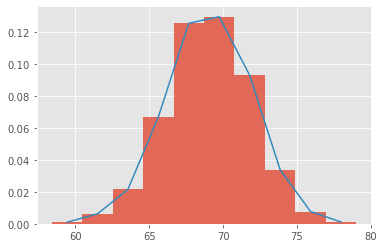

In [27]:
# Initialize numpy arrays according to number of bins with zeros to store interpolated values
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)

# Interpolate through histogram bins 
# identify middle point between two neighbouring bins, in terms of x and y coords
for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]

# plot the calculated curve
fig,ax = plt.subplots()
ax.hist(data=male_df,x= 'Height', alpha= 0.8, bins= 10, density= True)
ax.plot(pdfx, pdfy);

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

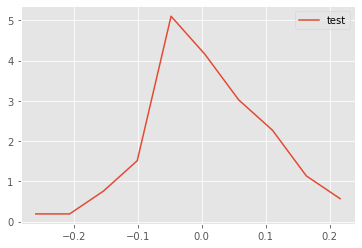

In [34]:
def density(x):
    import numpy as np
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend();

## Add overlapping density plots to the histograms plotted earlier

''

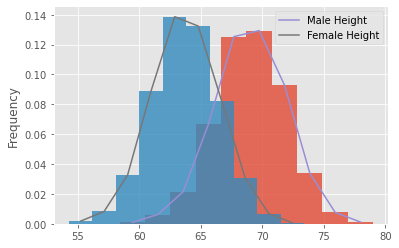

In [36]:
fig,ax=plt.subplots()
ax.hist(data=male_df,x= 'Height', alpha= 0.8, bins= 10, density= True)
ax.hist(data=female_df,x= 'Height', alpha= 0.8, bins= 10, density= True)
x1,y1 = density(male_df['Height'])
x2,y2 = density(female_df['Height'])
ax.plot(x1,y1)
ax.plot(x2,y2)
ax.set_ylabel('Frequency')
ax.legend(['Male Height','Female Height'])
;

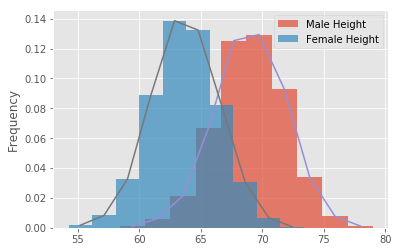

In [20]:
fig,ax=plt.subplots()
ax.hist(data=male_df,x= 'Height', alpha= 0.8, bins= 10, density= True)
ax.hist(data=female_df,x= 'Height', alpha= 0.8, bins= 10, density= True)
ax.plot(density(male_df['Height']))
ax.plot(density(female_df['Height']))
ax.set_ylabel('Frequency')
ax.legend(['Male Height','Female Height'])
;

## Repeat the above exercise for male and female weights

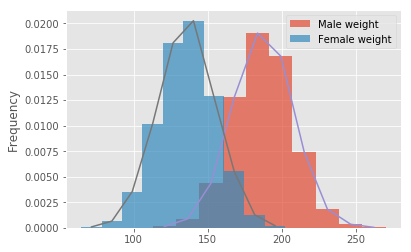

In [21]:
# Your code here 

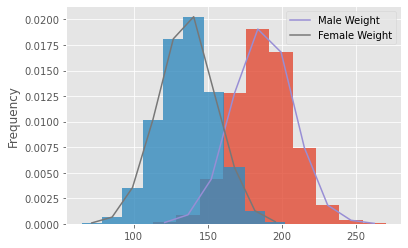

In [38]:
fig,ax=plt.subplots()
ax.hist(data=male_df,x= 'Weight', alpha= 0.8, bins= 10, density= True)
ax.hist(data=female_df,x= 'Weight', alpha= 0.8, bins= 10, density= True)
x1,y1 = density(male_df['Weight'])
x2,y2 = density(female_df['Weight'])
ax.plot(x1,y1)
ax.plot(x2,y2)
ax.set_ylabel('Frequency')
ax.legend(['Male Weight','Female Weight'])

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?
"""
Similar to the height data, males and females are distributed about the
same way, females might be a little more condenced. In general males weigh
about 50 lbs greater than females.
"""

# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

/Users/ronlodetti/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ronlodetti/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


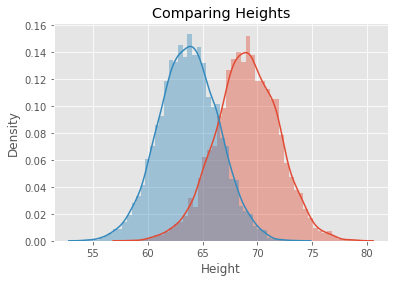

In [51]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

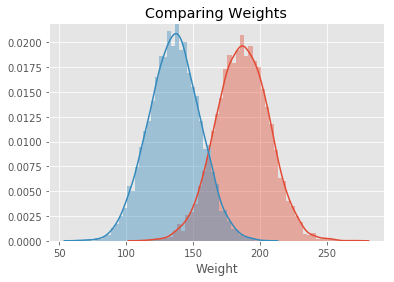

In [24]:
# Code for weights here

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.